<a href="https://colab.research.google.com/github/aubreymoore/code-for-CRB-damage-ai/blob/main/detect_and_annotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics

In [2]:
%pip install supervision


In [6]:
import cv2
import supervision as sv
from ultralytics import YOLO
from skimage import io
# ultralytics.checks()

In [7]:
model = YOLO("yolov8n.pt")  # pretrained YOLO8n model
image = io.imread('https://ultralytics.com/images/bus.jpg')
# image = cv2.imread(source='https://ultralytics.com/images/bus.jpg')
results = model(image)[0]


0: 640x480 4 persons, 1 bus, 175.8ms
Speed: 6.3ms preprocess, 175.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


In [8]:
detections = sv.Detections.from_ultralytics(results)

In [9]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

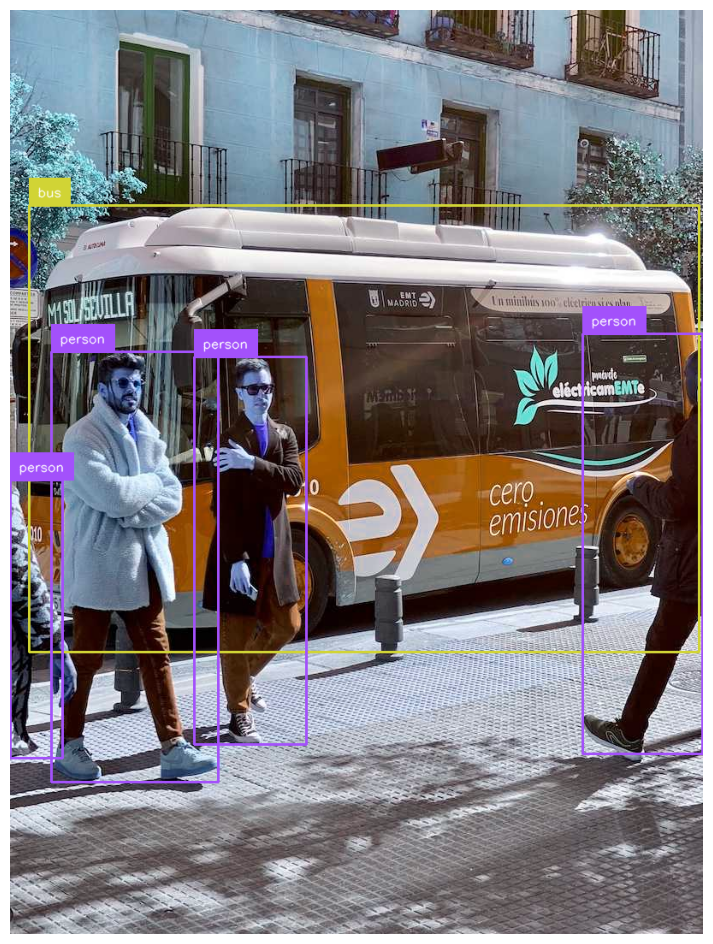

In [10]:
sv.plot_image(annotated_image)